In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd /content/drive/MyDrive/LAP_intern/Demo

/content/drive/MyDrive/LAP_intern/Demo


In [3]:
import tensorflow as tf
from PIL import Image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

In [4]:
# Load pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/LAP_intern/saved_model.h5')

In [5]:
# Create upload widget
uploaded_files = files.upload()

Saving N1.png to N1.png
Saving N2.png to N2.png
Saving N3.png to N3.png
Saving P1.png to P1.png
Saving P2.png to P2.png
Saving P3.png to P3.png


In [6]:
# Process uploaded images
images = []
for filename in uploaded_files.keys():
    img = Image.open(filename)
    img = img.resize((120, 120))  # Resize image if necessary
    img = np.array(img) / 255.0  # Normalize image if necessary
    images.append(img)

images = np.array(images)

In [7]:
# Run inference on images
predictions = model.predict(images)

1/1 [==============================] - 0s 422ms/step


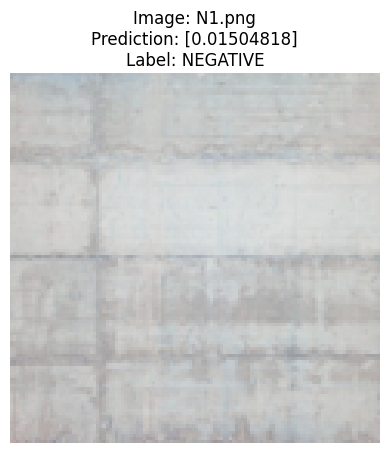

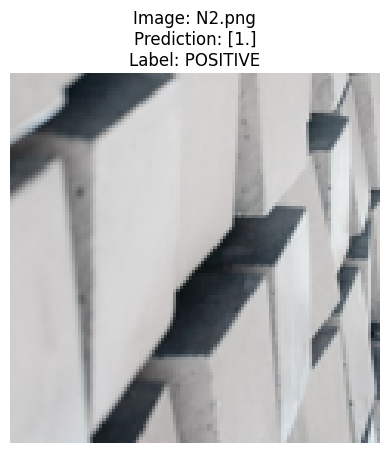

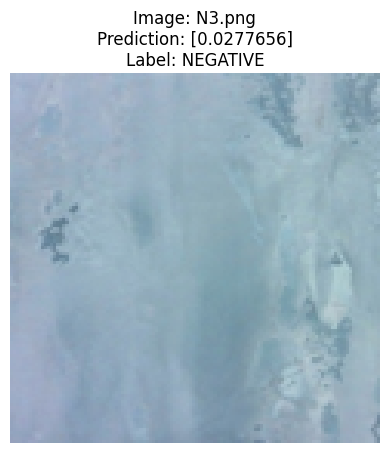

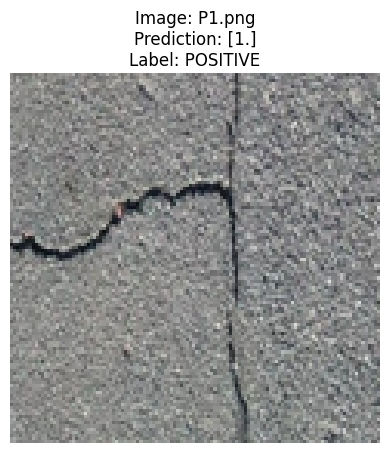

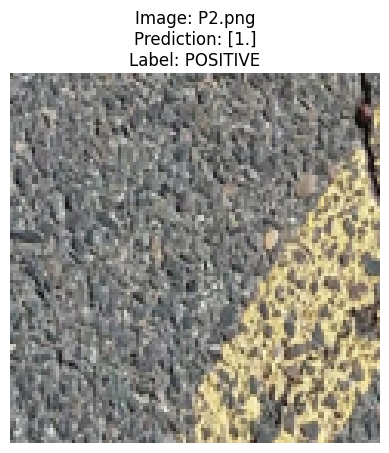

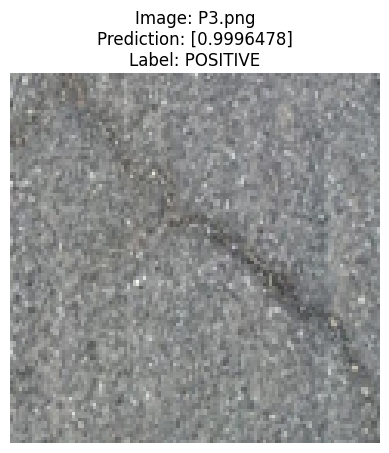

In [8]:
# Display results
for i in range(len(uploaded_files)):
    filename = list(uploaded_files.keys())[i]
    prediction = predictions[i]
    label = "NEGATIVE" if prediction < 0.5 else "POSITIVE"

    # Display image and label
    plt.figure()
    plt.imshow(images[i])
    plt.title(f"Image: {filename}\nPrediction: {prediction}\nLabel: {label}")
    plt.axis('off')
    plt.show()